<a href="https://colab.research.google.com/github/BobZhang26/AIPI-590--XAI-Assignment-6/blob/main/AIPI_590_XAI_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment 6
### Bob Zhang
### Description: For a model and dataset of your choice, produce PDP, ICE, and ALE plots. Exploratory analysis of your dataset should be performed to determine the amount of correlation between features. Provide a comprehensive explanation of your plots. Discuss any interesting findings that are shown in the plots. Discuss any differences you see in the PDP and ALE plots. Discuss your exploratory findings around correlation between features and the impact this has (if any) on your results.



[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/BobZhang26/AIPI-590--XAI-Assignment-6/blob/main/AIPI_590_XAI_Assignment_6.ipynb)

## Step 0: Setting up environment

In [69]:
# !pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython

In [70]:
# import essenstial packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
from alepython import ale_plot
# high resolution plot
%config InlineBackend.figure_format = 'retina'


## Step 1: Data preperation

> The Iris dataset is one of the most famous datasets in machine learning and data science, often used for educational purposes. It consists of data about the physical characteristics of three different species of iris flowers. Here is a detailed breakdown of the dataset:

> Features (Columns): The dataset includes four features (attributes) measured for each iris flower:

>> Sepal Length(cm): The length of the flower's sepal in centimeters.

>> Sepal Width(cm): The width of the flower's sepal in centimeters.

>> Petal Length(cm): The length of the flower's petal in centimeters.

>> Petal Width(cm): The width of the flower's petal in centimeters.

> These features are numeric, continuous variables, representing the physical dimensions of the flowers.

> Target (Labels): The target variable represents the species (or class) of the iris flowers. There are three distinct species, encoded as numbers in the dataset:

>> Setosa (encoded as 0)

>> Versicolor (encoded as 1)

>> Virginica (encoded as 2)

> Dataset Characteristics:
>> Number of Samples: 150 flowers (50 samples from each of the 3 species)

>> Number of Features: 4 (sepal length, sepal width, petal length, petal width)

>> Number of Classes: 3 (Setosa, Versicolor, Virginica)

The Iris dataset is small, easy to understand, and well-suited for demonstrating a variety of machine learning techniques, such as classification, visualization, and dimensionality reduction. It is particularly useful for demonstrating basic machine learning concepts and visualization techniques like scatter plots, decision boundaries, and partial dependence plots.

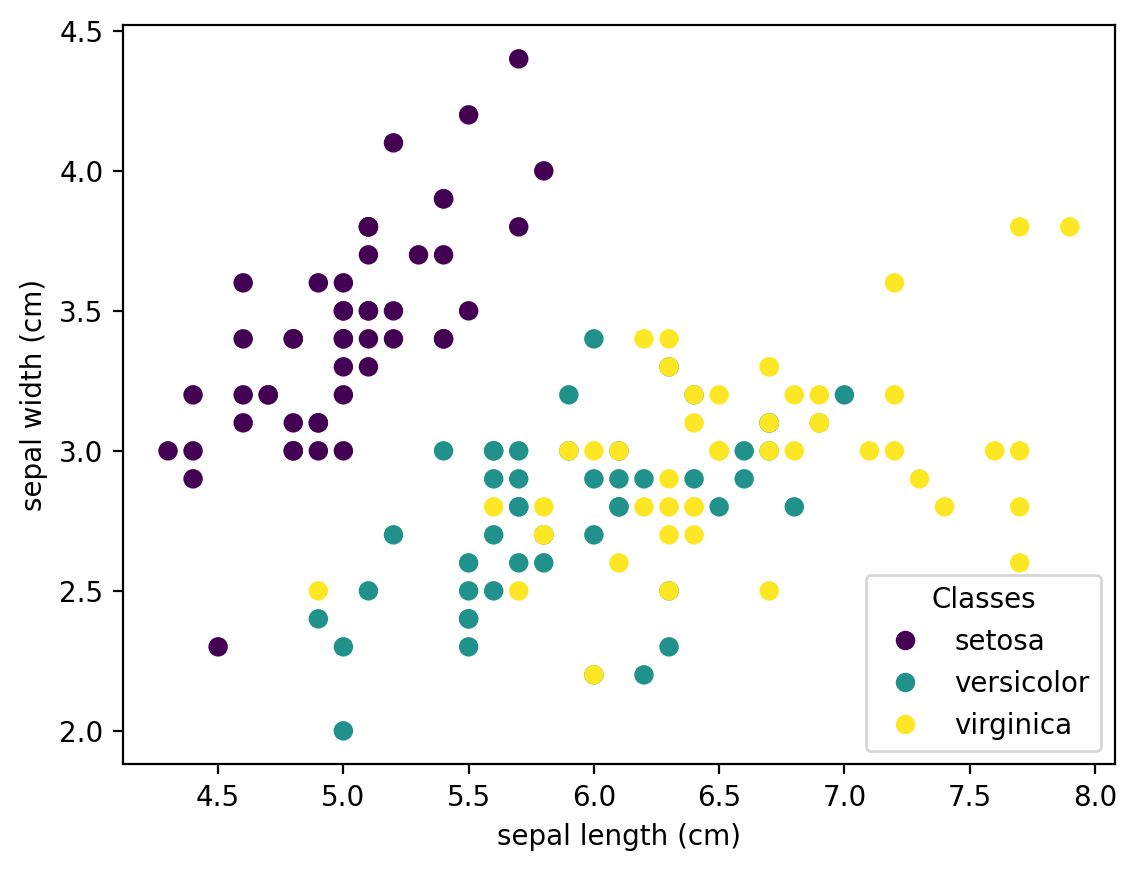

In [71]:
# load the dataset
iris = datasets.load_iris()
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

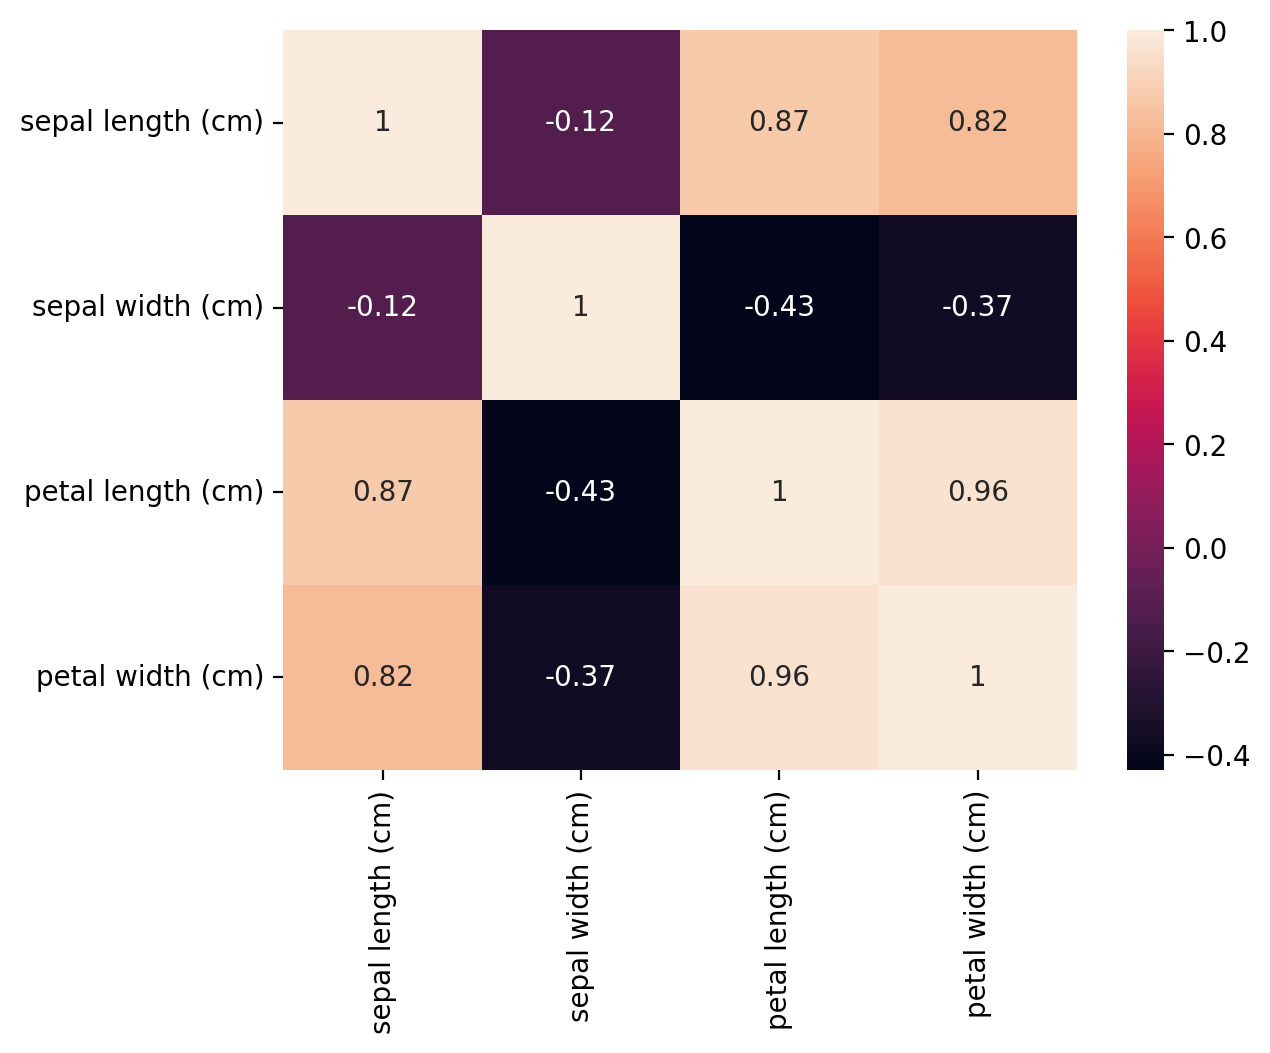

In [72]:
# perform correlation analysis
corr_matrix = pd.DataFrame(iris.data, columns=iris.feature_names).corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

### Discussion on correlation:
> The strong correlation between petal length and petal width supports the observation that petal dimensions are the most important features in the model's decision-making process.

> Sepal width and sepal length contribute less to the model's predictions, and their correlations with other features do not significantly affect the results.

> Despite the high correlation between petal length and petal width, both features are useful to the model because they provide slightly different patterns in distinguishing between the species (as seen in the ICE and ALE plots).

Overall, while there are some correlations between the features, the model's performance is not negatively affected because **RandomForest** and other tree-based models can handle correlated features well, often by selecting one over the other during splits.

In [73]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Step 2.1: Partial Dependent Plot

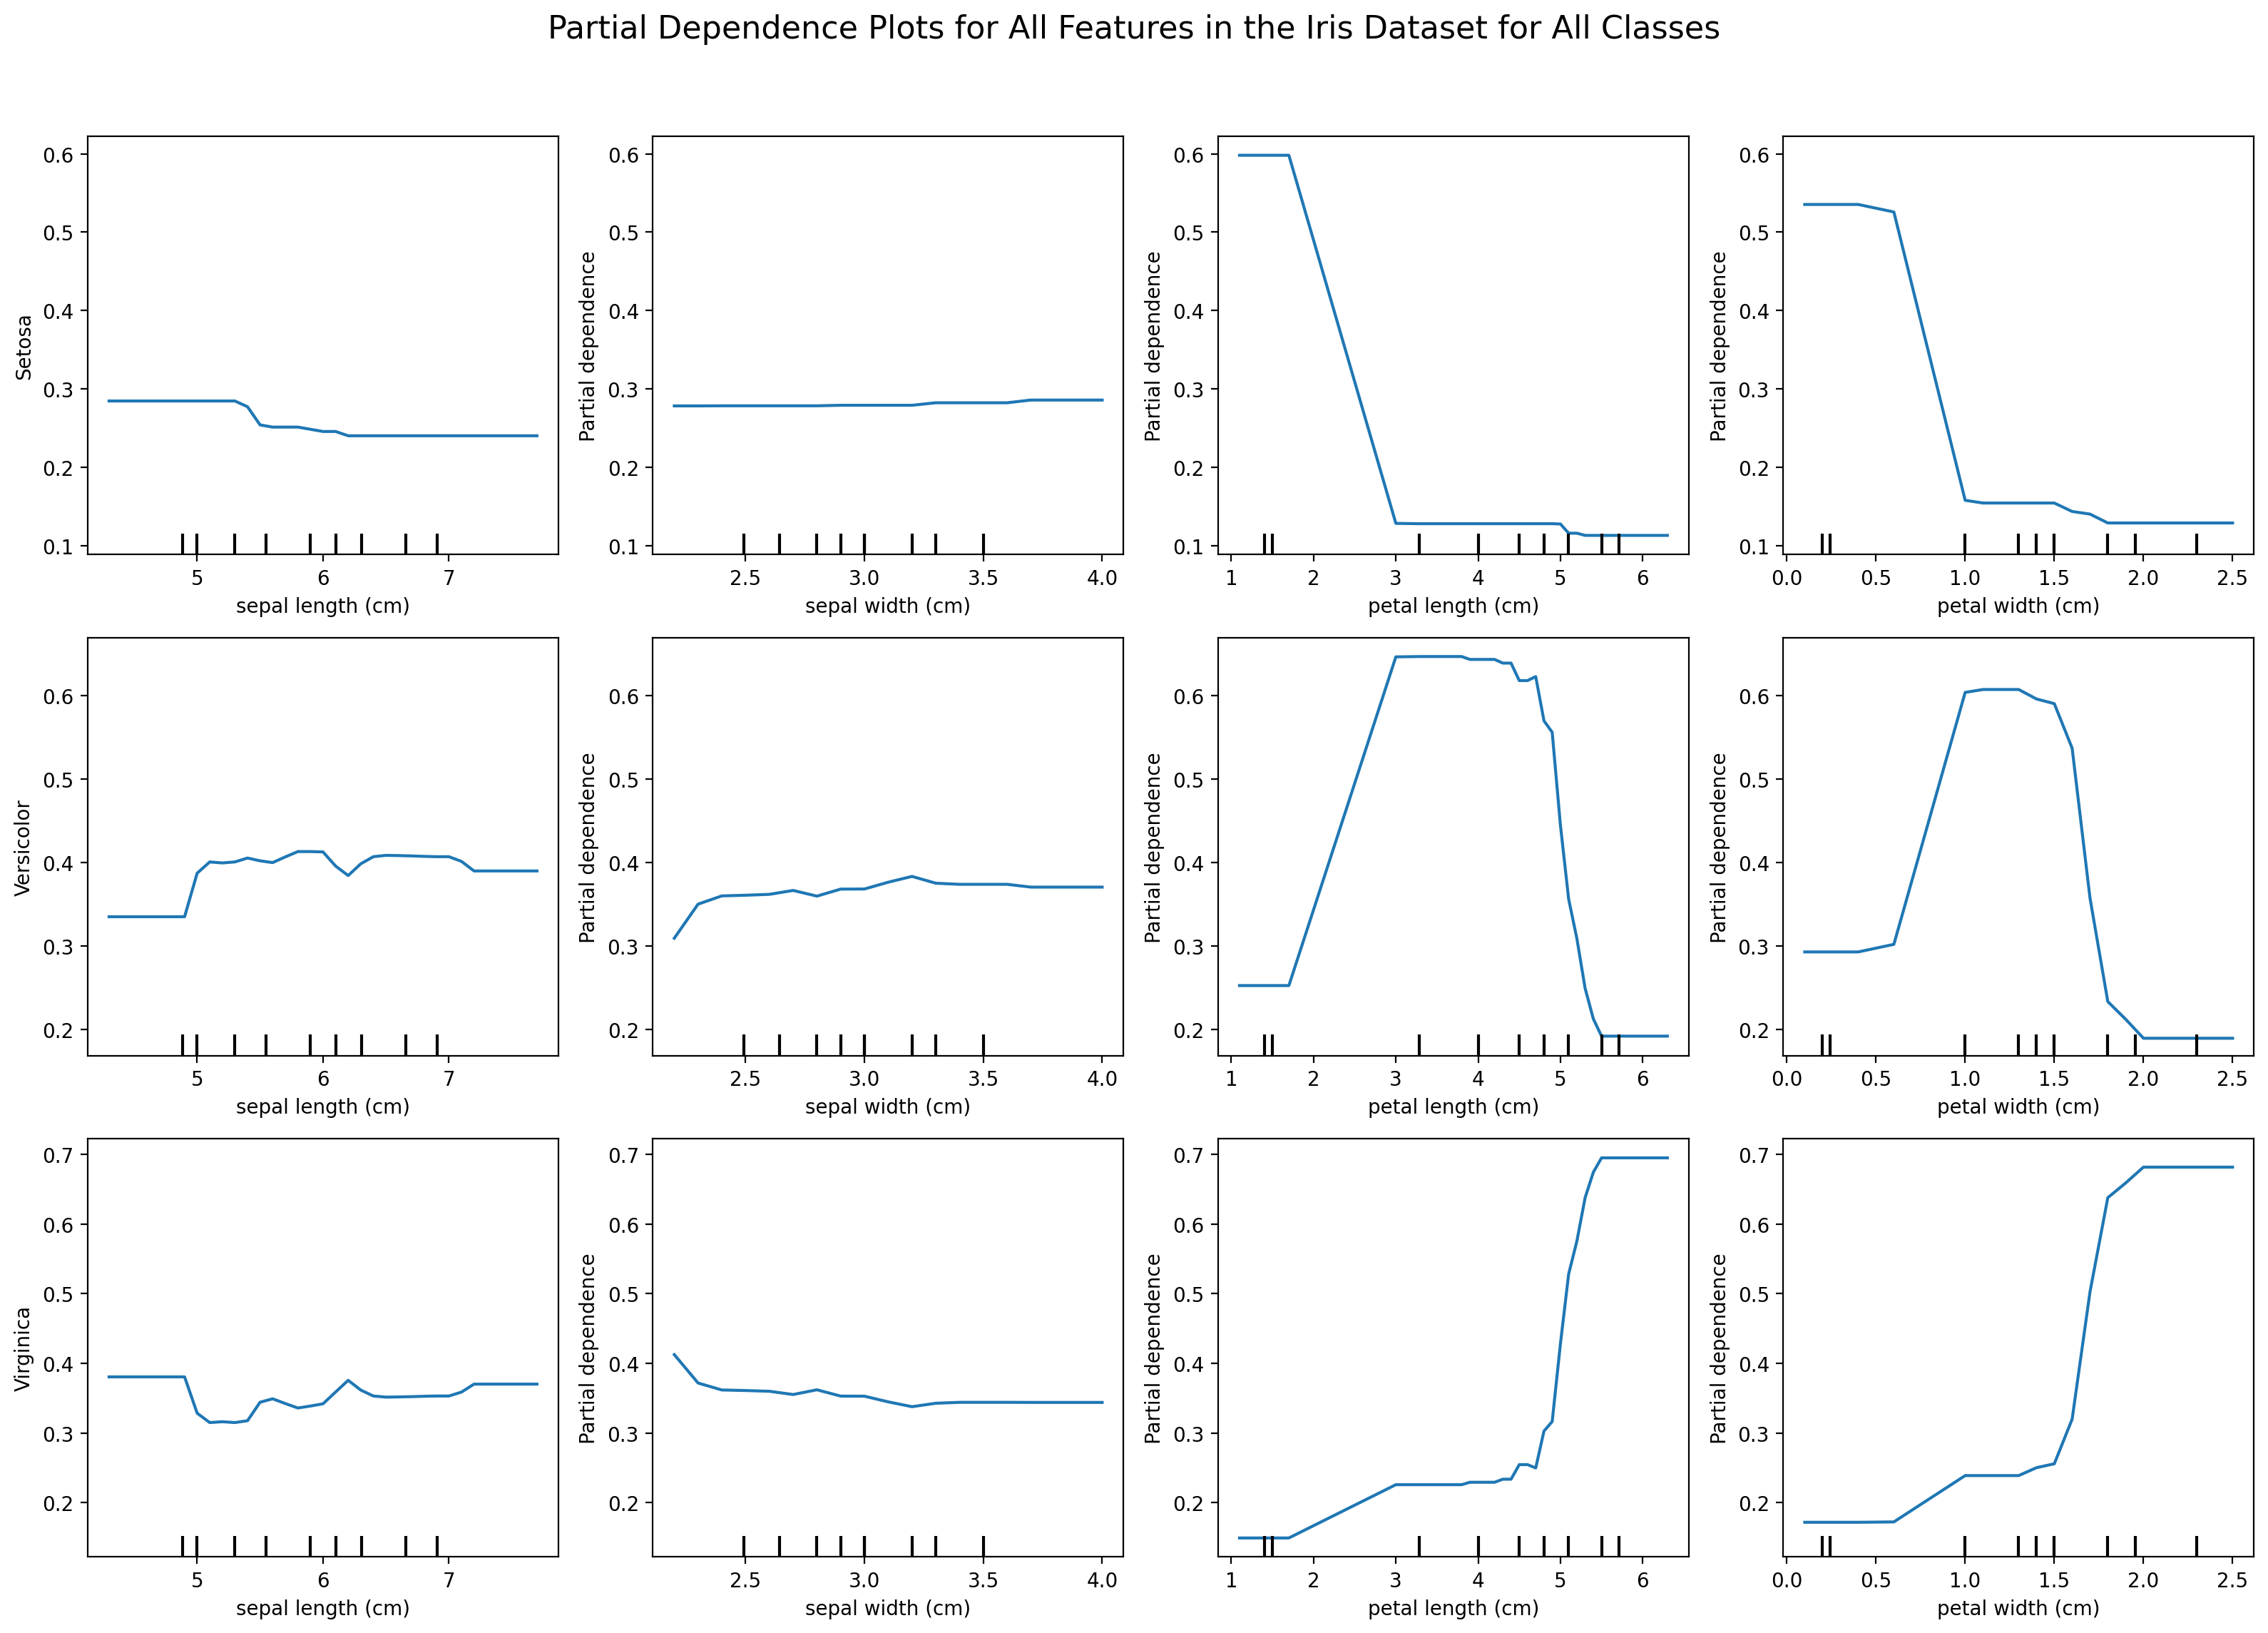

In [74]:
# Create PDPs for all four features for each class (Setosa, Versicolor, Virginica)
fig, axes = plt.subplots(figsize=(16, 12), nrows=3, ncols=4)
targets = ["Setosa" , "Versicolor" , "Virginica"]
for i in range(3):
  PartialDependenceDisplay.from_estimator(model, X_train, features=[0, 1, 2, 3], ax=axes[i], feature_names=iris.feature_names, target=i,kind="average")
  axes[i, 0].set_ylabel(targets[i])
# Set a title for the entire figure
plt.suptitle('Partial Dependence Plots for All Features in the Iris Dataset for All Classes', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### **Comments on PDP:**
The Partial Dependence Plots (PDPs) shown represent how each of the four features (sepal length, sepal width, petal length, and petal width) affects the probability of classifying a flower into one of the three Iris species (Setosa, Versicolor, and Virginica). Here's an interpretation of each set of plots:

### 1. **Setosa (First Row):**
   - **Sepal Length**: The plot shows that as sepal length increases, the probability of predicting Setosa gradually decreases. Flowers with shorter sepal lengths are more likely to be classified as Setosa.
   - **Sepal Width**: Sepal width does not have a significant impact on the prediction of Setosa, as the plot shows a fairly flat line.
   - **Petal Length**: Petal length has a strong influence on classifying Setosa. When petal length is very small (around 1 cm), the probability of predicting Setosa is very high. As petal length increases, this probability sharply decreases, which makes sense since Setosa has shorter petals compared to the other two species.
   - **Petal Width**: Similar to petal length, a small petal width is strongly associated with Setosa. The probability decreases sharply as petal width increases.

### 2. **Versicolor (Second Row):**
   - **Sepal Length**: Sepal length has a slightly positive relationship with the probability of predicting Versicolor. The probability increases a bit as the sepal length increases, but the relationship is not very strong.
   - **Sepal Width**: The influence of sepal width on predicting Versicolor is minimal, though there is a small increase in probability for mid-range values of sepal width.
   - **Petal Length**: The probability of predicting Versicolor increases sharply as petal length increases up to around 4-5 cm, after which the probability plateaus. This makes sense, as Versicolor typically has medium-length petals compared to Setosa and Virginica.
   - **Petal Width**: Similar to petal length, petal width strongly influences the prediction. The probability of predicting Versicolor increases with petal width until around 1-1.5 cm, after which it levels off.

### 3. **Virginica (Third Row):**
   - **Sepal Length**: The probability of predicting Virginica does not have a strong relationship with sepal length, though there is some fluctuation in the plot, suggesting a weak influence.
   - **Sepal Width**: Sepal width does not appear to play a significant role in the prediction of Virginica, as indicated by the flat plot.
   - **Petal Length**: Petal length has a strong positive influence on predicting Virginica. As petal length increases beyond 4-5 cm, the probability of predicting Virginica increases sharply, which makes sense because Virginica has the longest petals among the three species.
   - **Petal Width**: The plot shows a similar pattern to petal length. As petal width increases beyond 1.5 cm, the probability of predicting Virginica rises sharply, confirming that Virginica typically has wider petals.

### Summary of Key Insights:
- **Petal length and petal width** are the most important features for distinguishing between the three Iris species. Setosa has small petal lengths and widths, Versicolor has medium values, and Virginica has large values.
- **Sepal length and sepal width** have less influence overall, though sepal length has a slight impact on differentiating Setosa and Versicolor.
- **Setosa** is easiest to distinguish based on small petal measurements, while **Virginica** can be identified by larger petal measurements. **Versicolor** tends to have medium values for petal dimensions.

These PDPs offer insights into how the RandomForestClassifier uses each feature to classify the flowers, helping us understand which features contribute most to the predictions.

## Part 2.2: ICE

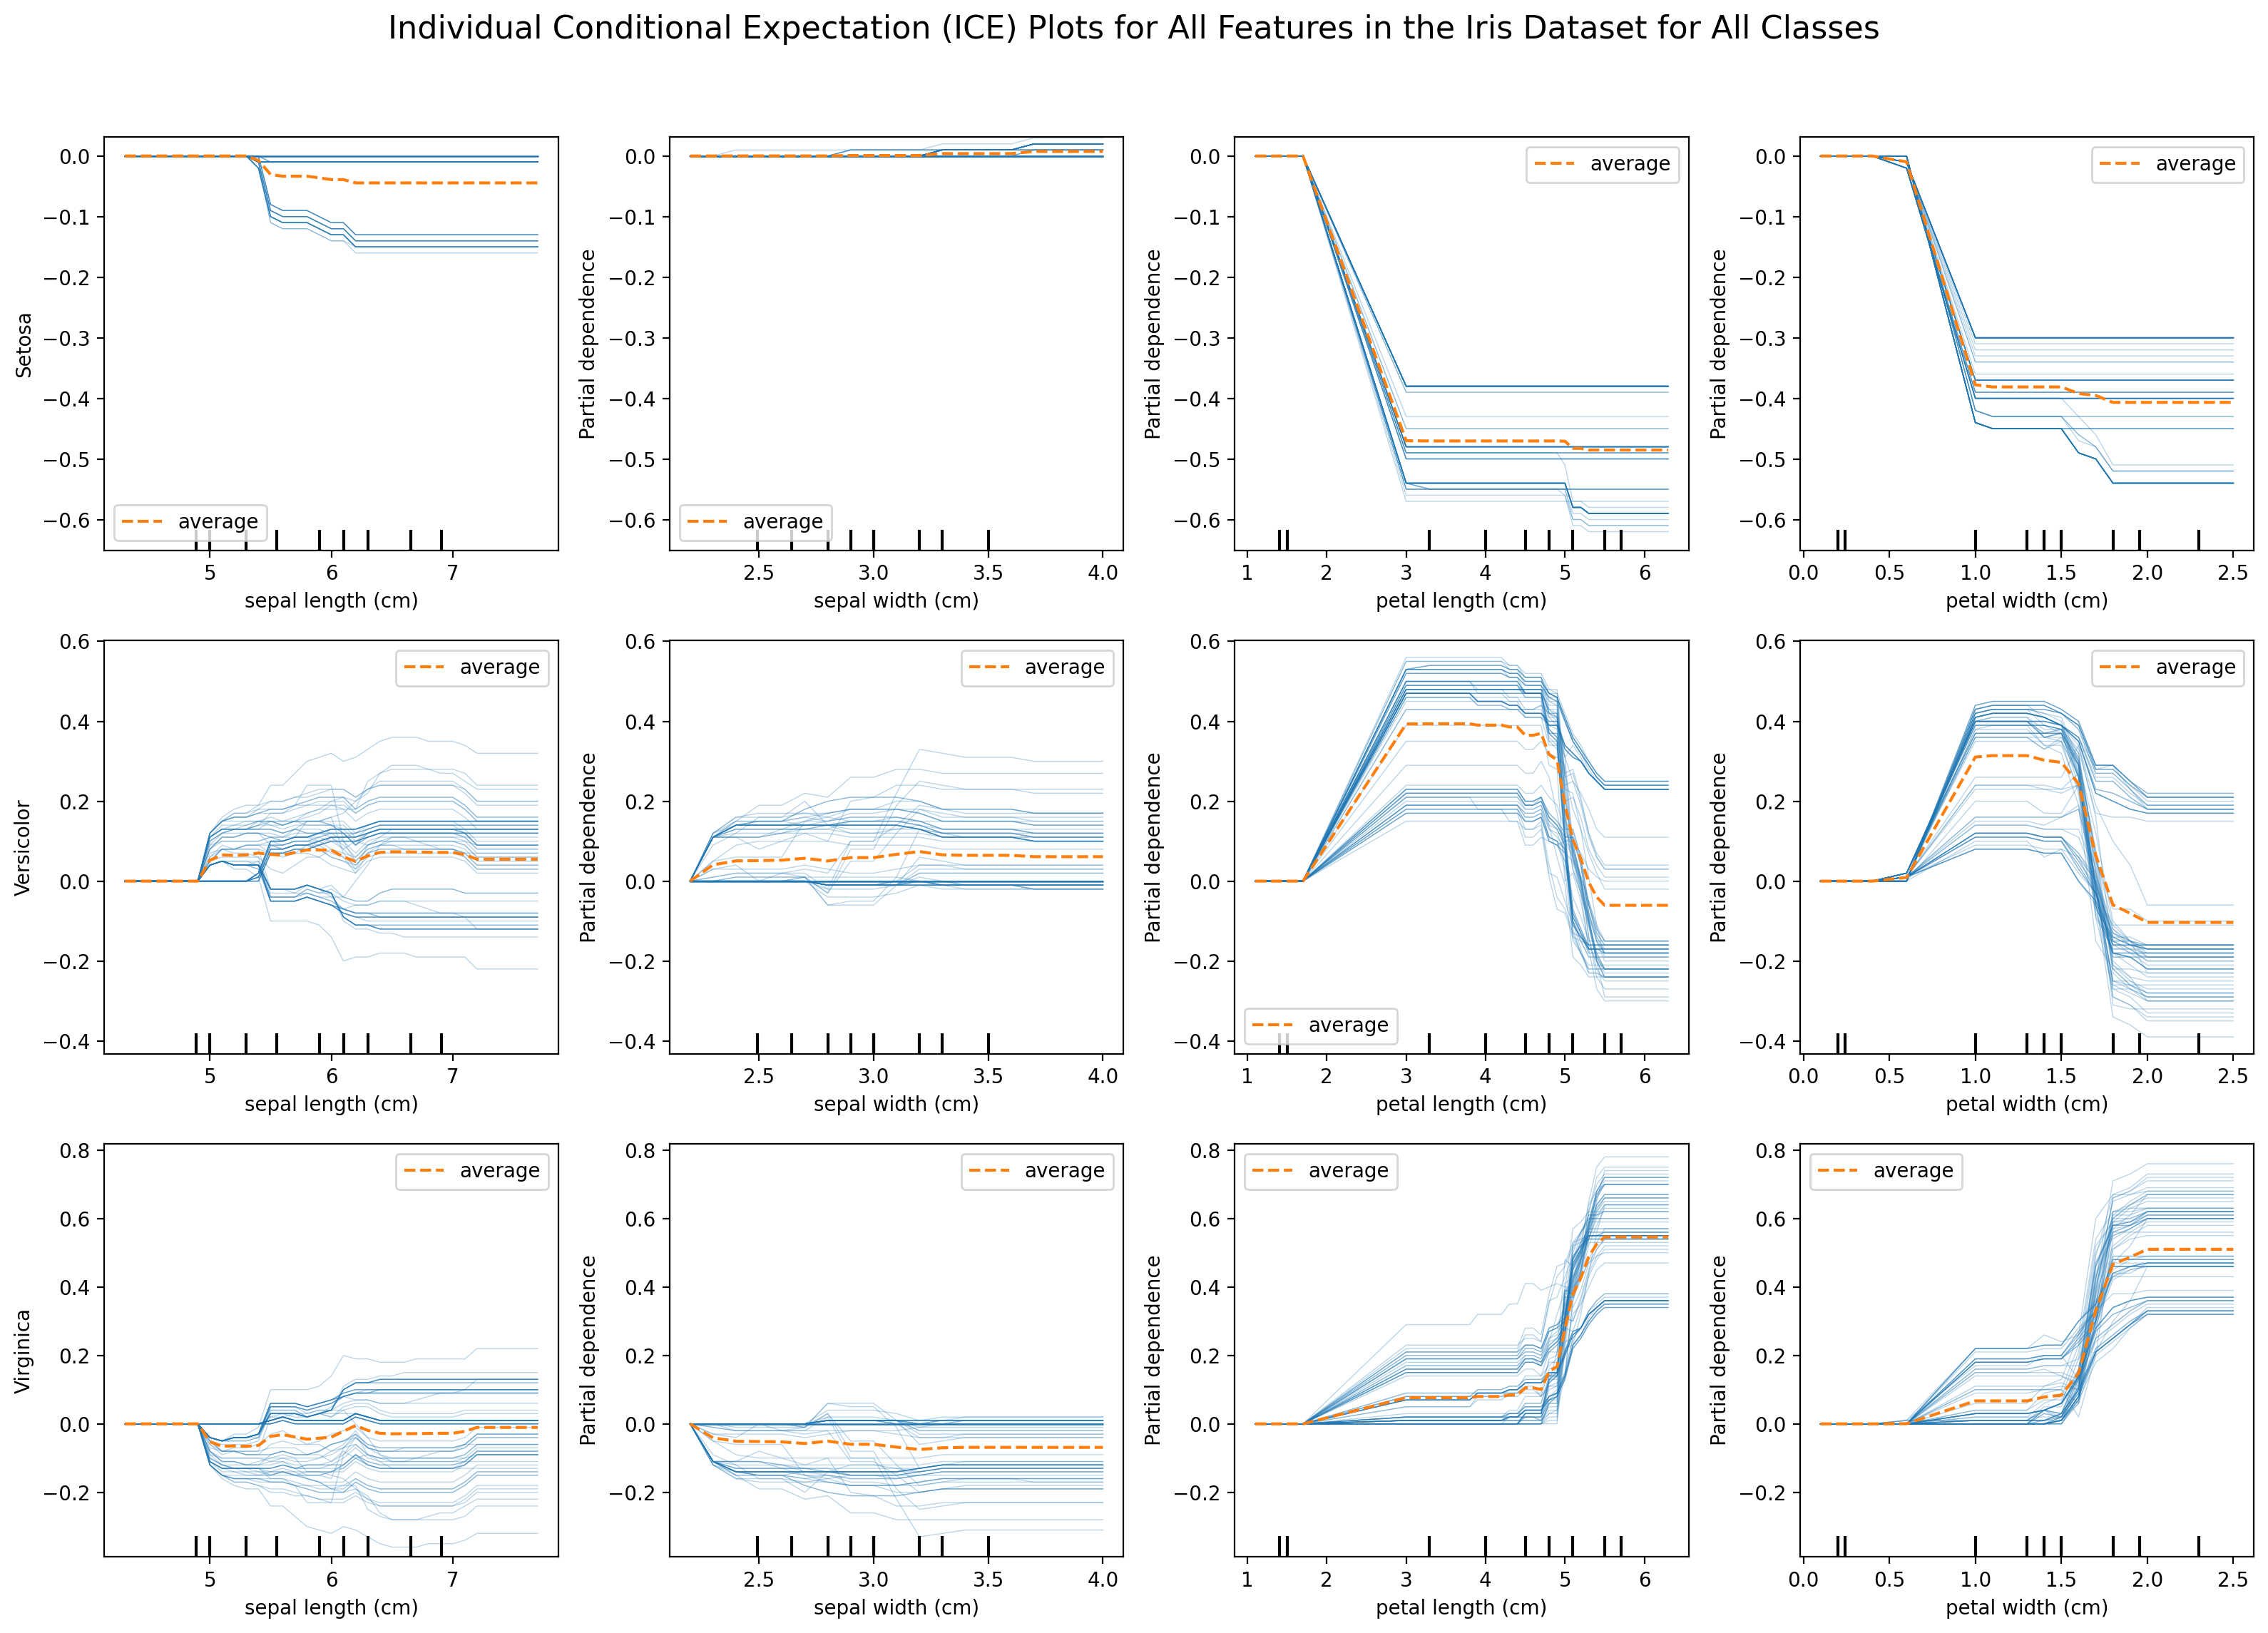

In [75]:
# Create PDPs for all four features for each class (Setosa, Versicolor, Virginica)
fig, axes = plt.subplots(figsize=(16, 12), nrows=3, ncols=4)
targets = ["Setosa" , "Versicolor" , "Virginica"]
for i in range(3):
  PartialDependenceDisplay.from_estimator(model, X_train, features=[0, 1, 2, 3], ax=axes[i], feature_names=iris.feature_names, target=i,kind="both",centered=True)
  axes[i, 0].set_ylabel(targets[i])
# Set a title for the entire figure
plt.suptitle('Individual Conditional Expectation (ICE) Plots for All Features in the Iris Dataset for All Classes', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### **Comment on ICE:**

The **Individual Conditional Expectation (ICE) plots** provide a more granular view of how each feature impacts the predictions for each class by showing the effect for individual instances in the dataset. Unlike **Partial Dependence Plots (PDPs)**, which show the average effect, ICE plots show how predictions change for each observation as the feature value changes.


### 1. **Sepal Length (cm)**:
   - **Setosa**:
     - The ICE lines show a sharp decrease in probability for larger sepal lengths (around 5-6 cm). For Setosa, the model predicts lower probabilities as sepal length increases, indicating that Setosa flowers typically have smaller sepal lengths.
   - **Versicolor**:
     - The ICE lines show some variation, with a moderate positive effect as sepal length increases from around 5 to 7 cm. This means that for some Versicolor samples, longer sepal lengths increase the probability of being classified as Versicolor.
   - **Virginica**:
     - The ICE lines for Virginica show a slight positive effect for some samples as sepal length increases, though the overall effect is weak. This suggests that for some Virginica flowers, longer sepal lengths lead to higher probabilities, but the effect is not consistent across all instances.

### 2. **Sepal Width (cm)**:
   - **Setosa**:
     - The ICE lines are nearly flat, showing that sepal width has little to no effect on the prediction for Setosa across different samples.
   - **Versicolor**:
     - For Versicolor, the ICE lines show some slight positive effect, but it is not consistent. Sepal width appears to have minimal impact on the model's predictions for this class.
   - **Virginica**:
     - Similar to Versicolor, sepal width has little effect on Virginica predictions, as indicated by the flat lines.

### 3. **Petal Length (cm)**:
   - **Setosa**:
     - The ICE lines show a sharp decrease in probability as petal length increases beyond 2 cm. This makes sense because Setosa typically has smaller petal lengths. The model strongly associates longer petal lengths with other species, leading to lower probabilities for Setosa.
   - **Versicolor**:
     - For Versicolor, petal length has a strong positive effect. The ICE lines show a sharp increase in probability for petal lengths between 3 and 5 cm. This indicates that petal length is a key distinguishing feature for Versicolor.
   - **Virginica**:
     - The ICE lines show a similar pattern as Versicolor, with an increasing trend in the probability of Virginica as petal length increases, particularly after 4 cm. Virginica flowers typically have the longest petals, so longer petal lengths result in higher predictions for Virginica.

### 4. **Petal Width (cm)**:
   - **Setosa**:
     - Similar to petal length, the ICE lines show a sharp decline in probability as petal width increases beyond 0.5 cm. Setosa flowers have narrower petals, so the model associates wider petal widths with other species.
   - **Versicolor**:
     - The ICE lines show a steep increase in probability for petal widths between 1.0 and 1.5 cm, highlighting petal width as an important feature for predicting Versicolor. Once again, the effect is strong for Versicolor.
   - **Virginica**:
     - For Virginica, the ICE lines show a strong positive effect for petal widths beyond 1.5 cm. Virginica has the widest petals, so wider petal widths result in higher probabilities of predicting Virginica.

### Key Insights from the ICE Plots:
1. **Petal length and petal width** are the most important features for distinguishing between the three Iris species. Setosa has the smallest petals (both in length and width), Versicolor has medium-sized petals, and Virginica has the largest petals.
2. **Sepal length** has a moderate impact on the classification, particularly for Setosa and Versicolor, but its effect is less consistent compared to petal features.
3. **Sepal width** has the least impact across all three classes, with the ICE lines being mostly flat for all species.
4. **Variability among instances**: The ICE plots show that the model's predictions can vary significantly for different instances of the same class, especially for features like sepal length and petal width. This variability is captured well by ICE plots and provides insights into how individual samples are affected by each feature.

Overall: The ICE plots confirm that the model relies heavily on **petal features** (length and width) to distinguish between the species in the Iris dataset. The **sepal features** (length and width) play a secondary role, with minimal influence, particularly for Setosa and Virginica.

## Part 2.3: ALE

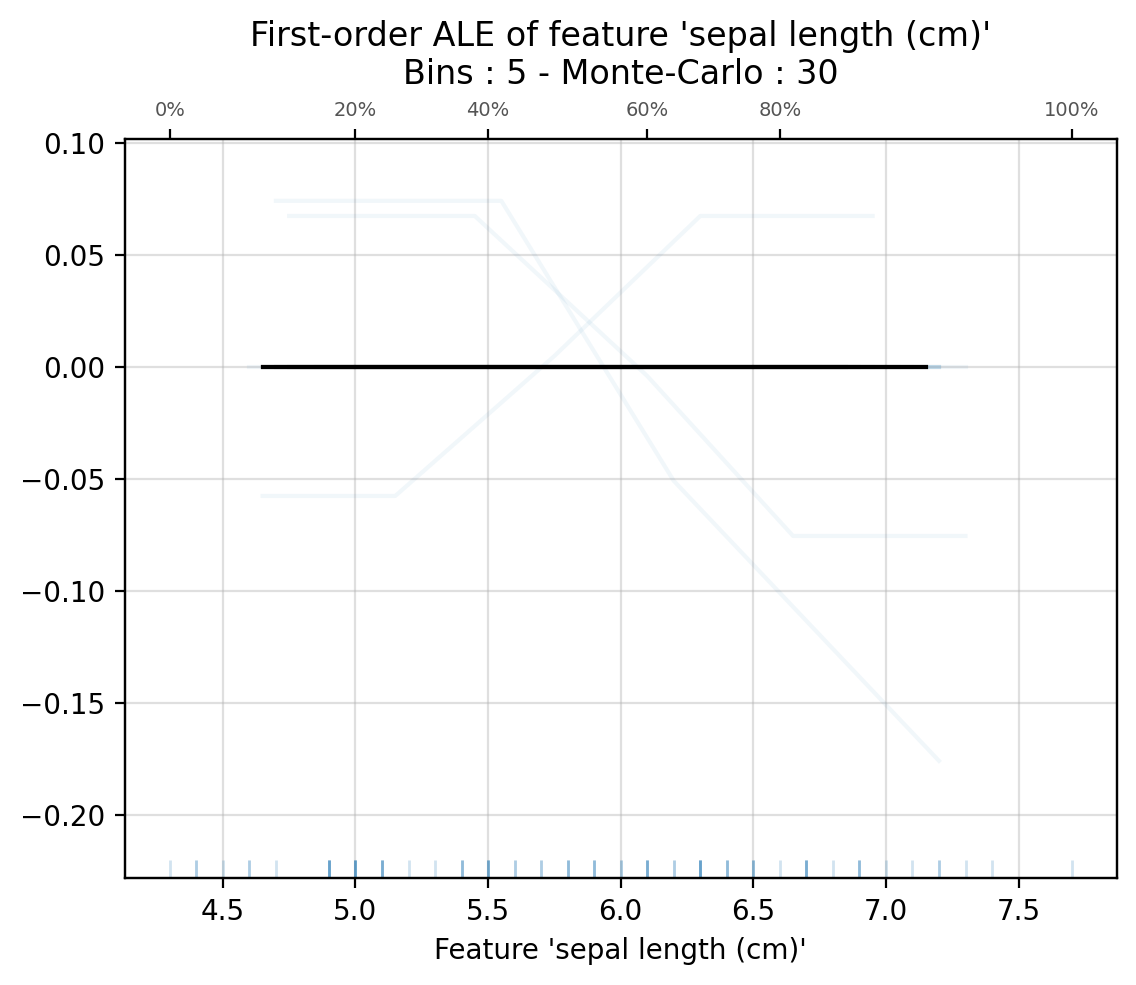

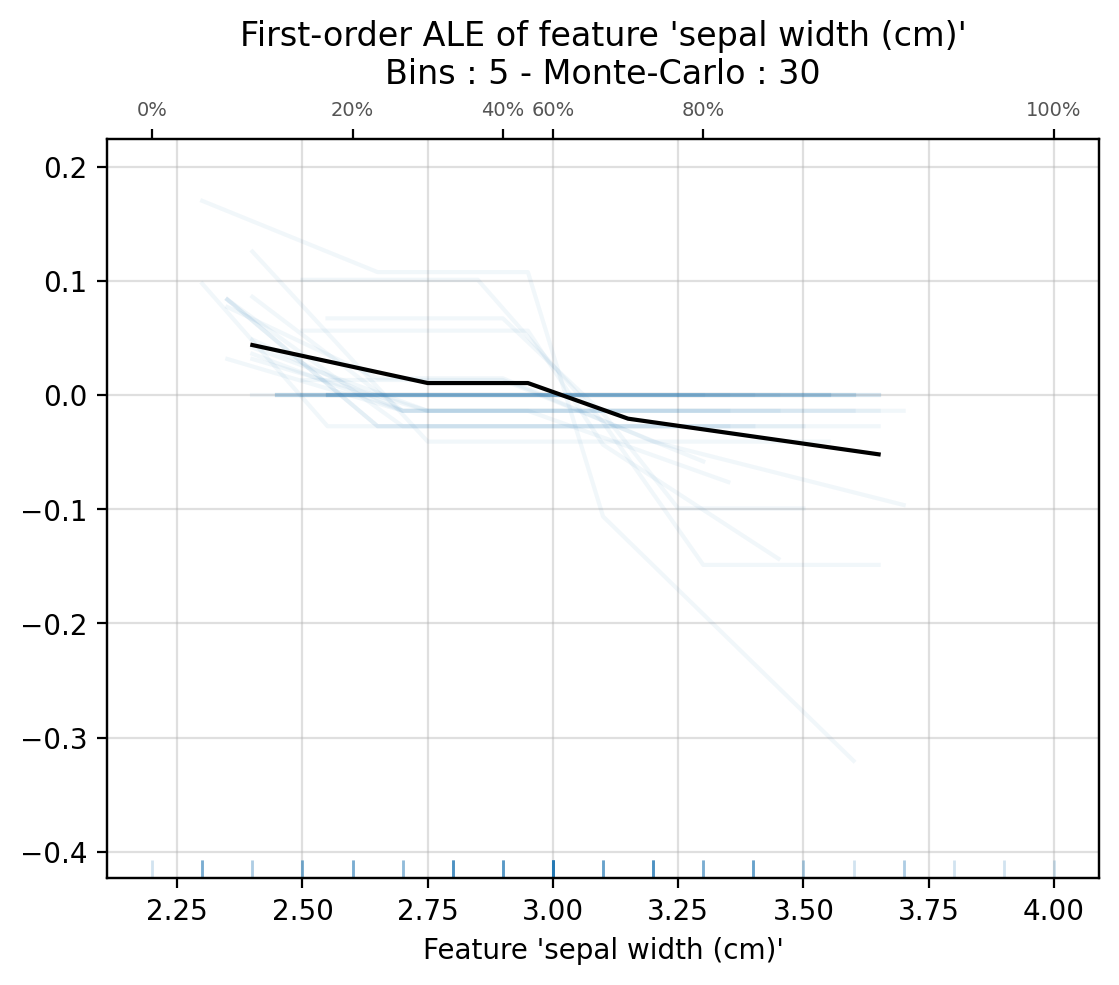

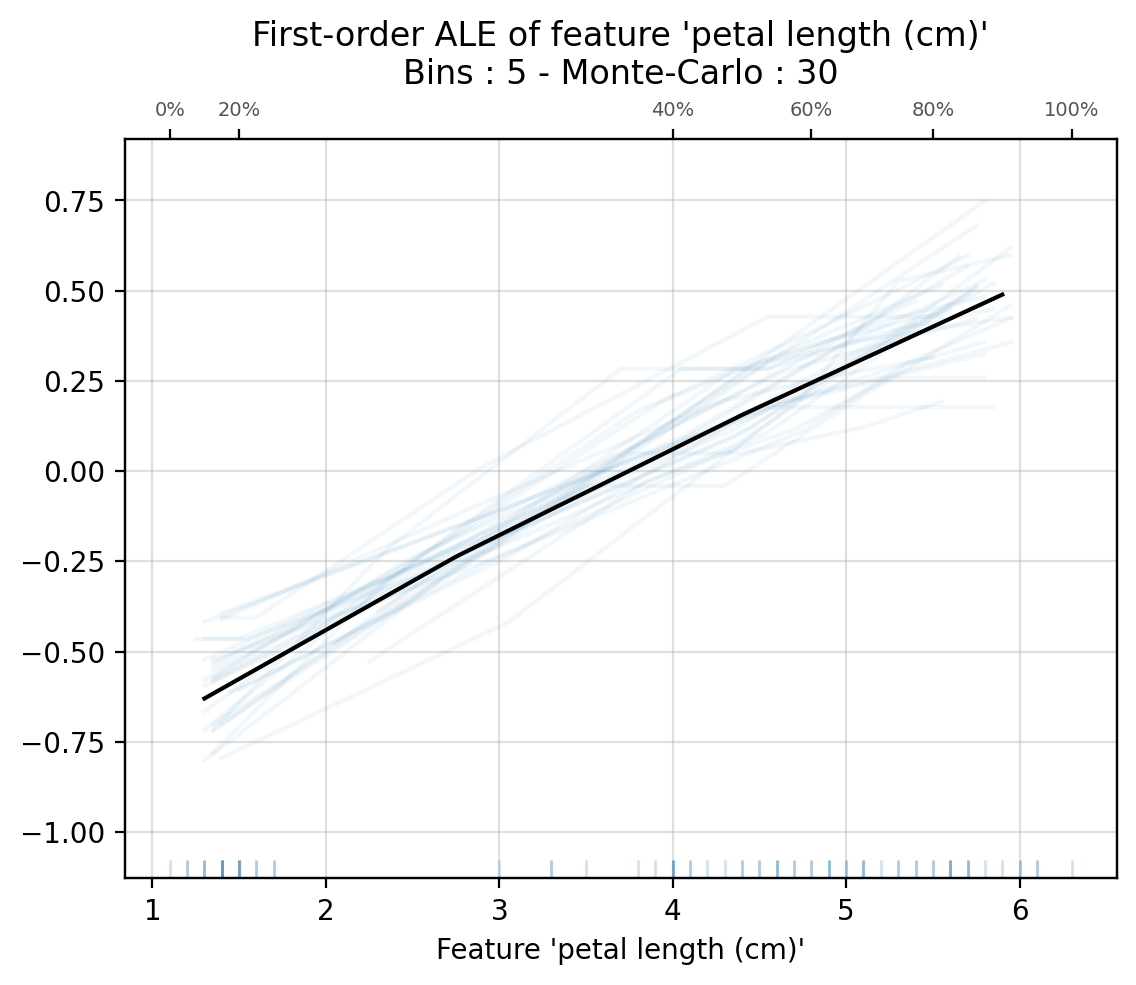

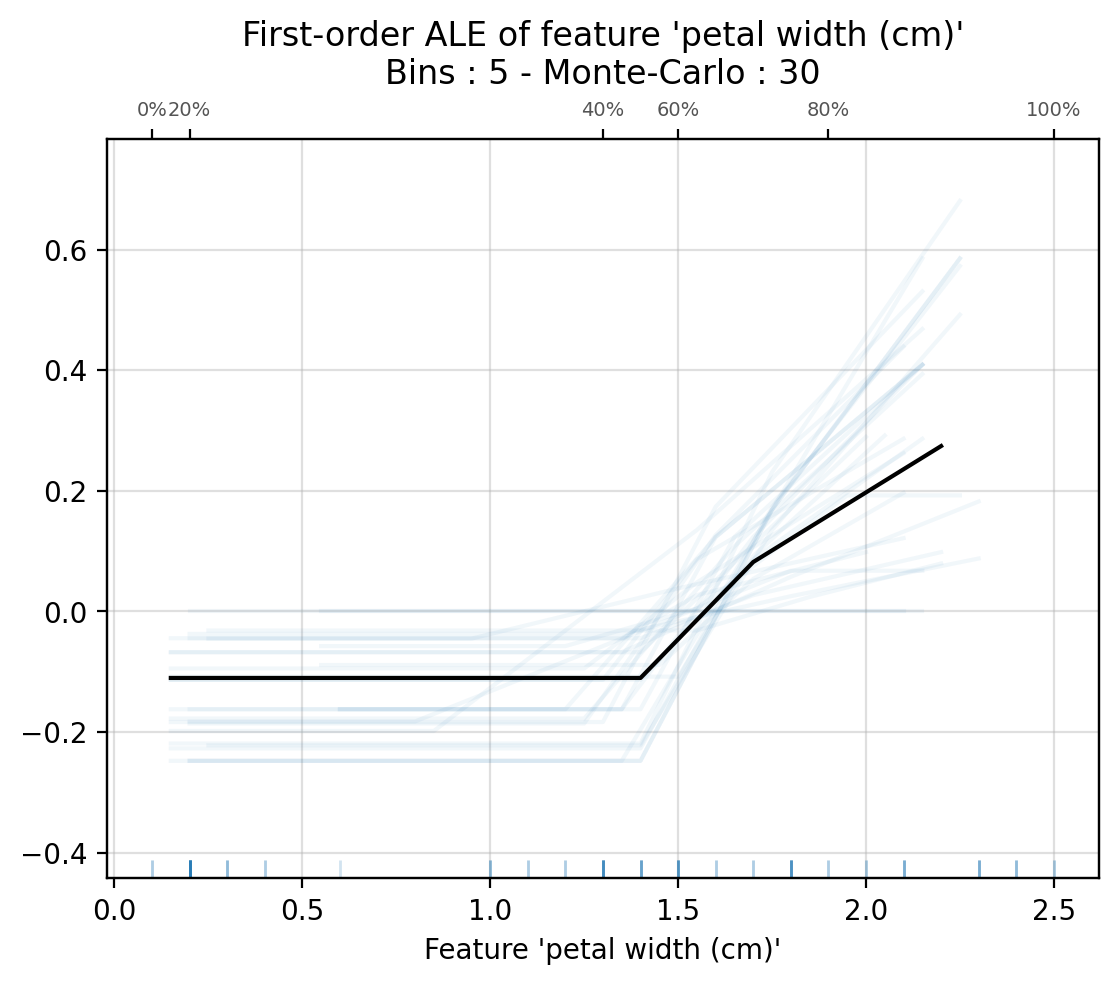

In [76]:
# Use default parameters for 1D Main Effect ALE Plot
#ale_plot(model, X_train, iris.feature_names[3], monte_carlo=True)
# Change hyperparameters for 1D Main Effect ALE Plot
#fig, axes = plt.subplots(figsize=(16, 12), nrows=2, ncols=2)
for i in range(4):
  ale_plot(
      model,
      X_train,
      iris.feature_names[i],
      bins=5,
      monte_carlo=True,
      monte_carlo_rep=30,
      monte_carlo_ratio=0.5,
  )

### **Comment on ALE:**
The plots you provided represent **Accumulated Local Effects (ALE)** for different features in the **Iris dataset**. ALE plots are a model-agnostic method to explain how each feature influences predictions in a machine learning model. Here’s the interpretation for each feature:

### 1. **Sepal Length (cm)**:
   - **Plot Characteristics**: The ALE plot for sepal length shows almost no change (flat line), meaning that the model does not change its prediction based on variations in sepal length.
   - **Interpretation**: The model is likely not using sepal length as a key factor in distinguishing between the different Iris species. Therefore, this feature has little influence on the model's predictions.

### 2. **Sepal Width (cm)**:
   - **Plot Characteristics**: The plot shows a slightly decreasing trend, especially as sepal width increases beyond 2.5 cm. There is a noticeable negative slope after 3.0 cm, indicating that higher sepal widths reduce the model’s predicted probability for certain classes.
   - **Interpretation**: Sepal width has some influence on the model's predictions. As sepal width increases, the model adjusts its predictions slightly, with larger widths lowering the predicted probability of certain species, possibly Setosa or Versicolor. However, the overall impact of sepal width is relatively small compared to other features.

### 3. **Petal Length (cm)**:
   - **Plot Characteristics**: This plot shows a strong increasing trend. As petal length increases, the ALE values increase significantly.
   - **Interpretation**: Petal length is a key distinguishing factor for the model. As petal length increases, the model adjusts predictions in favor of species that are more likely to have longer petals, such as Virginica. This is consistent with the biological differences in Iris species, where Virginica has the longest petals, followed by Versicolor, and then Setosa with the shortest petals.

### 4. **Petal Width (cm)**:
   - **Plot Characteristics**: The ALE plot for petal width shows a similar increasing trend. As petal width increases, the ALE value rises steadily.
   - **Interpretation**: Petal width is another important feature in the model's decision-making process. Larger petal widths are strongly associated with the Virginica species, which is consistent with real-world observations. Therefore, as petal width increases, the model shifts predictions towards Virginica.

### Summary of Key Insights:
- **Key Features**: The ALE plots for **petal length** and **petal width** show the strongest effects on the model's predictions, which aligns with what is known about the Iris dataset. Virginica has both the longest petals and the widest petals, so the model increases the probability of Virginica as these features increase.
- **Less Important Features**: **Sepal length** and **sepal width** have much weaker effects on the predictions, as their ALE plots are relatively flat or show minimal changes. This indicates that these features are not as critical in distinguishing between the Iris species in the model.

Overall, the **ALE plots** provide a clear picture of which features are most influential in the model's predictions for the Iris dataset, with petal characteristics (length and width) playing the dominant role.